In [ ]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=b3abfefd0ac9f641c8d853cbaf200729be17fedc7c15978ff39c02cf9d23359d
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [ ]:
import os
import re
from pathlib import Path
from nltk.tokenize import RegexpTokenizer
from collections import Counter
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import datasets
import matplotlib
import matplotlib.pyplot as plt
import wget
%matplotlib inline  

## Libraries:

Numpy: http://www.numpy.org/

Pandas: https://pandas.pydata.org/

Scikit-learn: http://scikit-learn.org/stable/

SciPy: https://www.scipy.org/

## Working with datasets

In [ ]:
iris = datasets.load_iris()

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
iris['data'].shape

(150, 4)

In [ ]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris_df = pd.DataFrame(iris['data'], columns=iris["feature_names"])

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris_df[iris_df["sepal width (cm)"] > 3.5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
10,5.4,3.7,1.5,0.2
14,5.8,4.0,1.2,0.2
15,5.7,4.4,1.5,0.4
16,5.4,3.9,1.3,0.4
18,5.7,3.8,1.7,0.3
19,5.1,3.8,1.5,0.3
21,5.1,3.7,1.5,0.4
22,4.6,3.6,1.0,0.2


In [ ]:
# columns indexed 1,2
iris_df.iloc[:, 1:3]

,sepal width (cm),petal length (cm)
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4
...,...,...
145,3.0,5.2
146,2.5,5.0
147,3.0,5.2
148,3.4,5.4


In [ ]:
# rows indexed 10-14
iris_df.iloc[10:15, :]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
10,5.4,3.7,1.5,0.2
11,4.8,3.4,1.6,0.2
12,4.8,3.0,1.4,0.1
13,4.3,3.0,1.1,0.1
14,5.8,4.0,1.2,0.2


In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 20 newsgroups dataset

In [ ]:
filename = wget.download("https://github.com/MIE1513HS-2022/course-datasets/raw/main/20_newsgroups.zip")

In [ ]:
!unzip 20_newsgroups

Streaming output truncated to the last 5000 lines.
  inflating: 20_newsgroups/talk.politics.guns/54588  
  inflating: 20_newsgroups/talk.politics.guns/54127  
  inflating: 20_newsgroups/talk.politics.guns/53302  
  inflating: 20_newsgroups/talk.politics.guns/54315  
  inflating: 20_newsgroups/talk.politics.guns/54771  
  inflating: 20_newsgroups/talk.politics.guns/54543  
  inflating: 20_newsgroups/talk.politics.guns/55233  
  inflating: 20_newsgroups/talk.politics.guns/55039  
  inflating: 20_newsgroups/talk.politics.guns/54749  
  inflating: 20_newsgroups/talk.politics.guns/55234  
  inflating: 20_newsgroups/talk.politics.guns/54782  
  inflating: 20_newsgroups/talk.politics.guns/54544  
  inflating: 20_newsgroups/talk.politics.guns/54312  
  inflating: 20_newsgroups/talk.politics.guns/54120  
  inflating: 20_newsgroups/talk.politics.guns/53305  
  inflating: 20_newsgroups/talk.politics.guns/54915  
  inflating: 20_newsgroups/talk.politics.guns/54129  
  inflating: 20_newsgroups/talk

In [ ]:
DATA_DIR = "20_newsgroups"

In [ ]:
os.listdir(DATA_DIR)

['rec.motorcycles',
 'talk.politics.guns',
 'rec.autos',
 'comp.sys.ibm.pc.hardware',
 'talk.politics.misc',
 'sci.electronics',
 'comp.graphics',
 'rec.sport.hockey',
 'alt.atheism',
 'sci.med',
 'sci.crypt',
 'comp.os.ms-windows.misc',
 'rec.sport.baseball',
 'sci.space',
 'misc.forsale',
 'comp.windows.x',
 'comp.sys.mac.hardware',
 'soc.religion.christian',
 'talk.politics.mideast',
 'talk.religion.misc']

In [ ]:
os.listdir(os.path.join(DATA_DIR, "rec.autos"))

['103024',
 '102784',
 '103007',
 '103307',
 '103034',
 '103804',
 '103438',
 '101596',
 '103760',
 '102763',
 '103194',
 '102868',
 '103318',
 '103461',
 '103496',
 '103492',
 '101622',
 '103750',
 '102994',
 '103199',
 '102986',
 '103448',
 '103505',
 '103023',
 '102962',
 '102901',
 '103157',
 '103039',
 '103809',
 '103451',
 '102932',
 '103125',
 '103303',
 '103807',
 '102845',
 '103197',
 '102824',
 '103043',
 '103261',
 '103304',
 '103682',
 '103184',
 '103174',
 '103743',
 '102828',
 '102789',
 '103126',
 '101658',
 '101626',
 '103429',
 '103415',
 '103526',
 '101620',
 '103425',
 '103301',
 '101644',
 '103500',
 '101564',
 '103192',
 '102773',
 '103753',
 '103352',
 '103295',
 '101635',
 '102827',
 '103313',
 '103678',
 '103717',
 '102988',
 '103686',
 '103369',
 '103665',
 '101601',
 '101677',
 '102977',
 '103695',
 '102831',
 '103298',
 '101654',
 '102830',
 '103055',
 '101571',
 '102928',
 '103349',
 '101576',
 '103189',
 '102935',
 '103674',
 '102999',
 '103530',
 '102767',

In [ ]:
print(open(os.path.join(DATA_DIR, "rec.autos", "103070"), "r").read())

Path: cantaloupe.srv.cs.cmu.edu!rochester!udel!gatech!howland.reston.ans.net!usenet.ins.cwru.edu!po.CWRU.Edu!aas7
From: aas7@po.CWRU.Edu (Andrew A. Spencer)
Newsgroups: rec.autos
Subject: Re: Manual Shift Bigots
Date: 22 Apr 1993 01:14:18 GMT
Organization: Case Western Reserve University, Cleveland, OH (USA)
Lines: 29
Message-ID: <1r4rha$98b@usenet.INS.CWRU.Edu>
References: <C5LIw2.CAx@news.rich.bnr.ca> <Apr17.054325.15482@engr.washington.edu> <crh.735198797@regent.e-technik.tu-muenchen.de> <Apr19.195700.19699@engr.washington.edu> <1993Apr21.100149.1501@rtsg.mot.com> <1993Apr21.184447.19630@bnr.ca>
Reply-To: aas7@po.CWRU.Edu (Andrew A. Spencer)
NNTP-Posting-Host: slc5.ins.cwru.edu


In a previous article, dwjz@bnr.ca (Doug Zolmer) says:

>In article <1993Apr21.100149.1501@rtsg.mot.com>, kissane@black.Berkeley.EDU (John G. Kissane) writes:
>|> As a matter of interest does anyone know why autos are so popular in the US while 
>|> here in Europe they are rare??? Just wondering.....
>
>In 

In [ ]:
# build a list of paths of all files
all_files = [pth for pth in Path(DATA_DIR).glob("**/*") if pth.is_file() and not pth.name.startswith(".")]

In [ ]:
len(all_files)

19997

In [ ]:
all_files[:5]

[PosixPath('20_newsgroups/rec.motorcycles/105153'),
 PosixPath('20_newsgroups/rec.motorcycles/104599'),
 PosixPath('20_newsgroups/rec.motorcycles/104375'),
 PosixPath('20_newsgroups/rec.motorcycles/104293'),
 PosixPath('20_newsgroups/rec.motorcycles/104740')]

## Building a feature set for classification

### Finding the most common words

In [ ]:
def clean_file_text(text):
    new_text = re.sub("Newsgroups:.*?\n", "", text)
    new_text = re.sub("Xref:.*?\n", "", new_text)
    new_text = re.sub("Path:.*?\n", "", new_text)
    new_text = re.sub("Date:.*?\n", "", new_text)
    new_text = re.sub("Followup-To:.*?\n", "", new_text)
    return new_text

def corpus_count_words(file_list):
    tokenizer = RegexpTokenizer(r'\w+')
    word_counter = Counter()
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data)
            file_words = tokenizer.tokenize(file_data)
            word_counter.update(file_words)
    return word_counter

In [ ]:
news_cnt = corpus_count_words(all_files)

In [ ]:
news_cnt.most_common(10)

[('the', 227359),
 ('to', 126510),
 ('of', 120164),
 ('a', 100558),
 ('and', 96676),
 ('I', 89455),
 ('is', 72055),
 ('in', 68295),
 ('that', 67484),
 ('AX', 62406)]

In [ ]:
num_words = 500
top_words = set([word for (word, freq) in news_cnt.most_common(num_words)])
print(top_words)

{'into', 'others', 'great', 'time', 'W', 'true', 'Apr', 'But', 'Host', '23', 'as', 'Q', 'said', 'idea', 'game', 're', 'him', 'now', 'best', 'In', 'way', 'work', 'without', 'EDU', 'm', 'Center', 'uk', 'made', '1993Apr21', '21', 'version', 'o', 'makes', 'see', 'system', 'netcom', 't', 'available', '17', 'J', 'V', 'And', 'never', 'were', 'most', 'att', 'uiuc', 'you', 'start', 'keep', 'its', 'Y', 'COM', 'data', 'again', 'To', 'net', 'group', 'no', 'else', '1993Apr15', 'wrote', 'has', 'seems', 'cs', 'even', 'Does', 'how', 'ever', 'my', 'It', 'wrong', 'read', 'Israel', '0', 'evidence', 'The', 'M', 'News', 'L', 'last', 'Re', '8', 'too', 'change', 'government', 'they', 'having', 'want', 'cc', 'ac', 'CA', 'co', 'same', 'call', 'References', 'one', 'using', 'No', '13', 'will', '1', 'State', 'use', 'hard', 'tell', 'cmu', 'done', 'not', '5', 'with', 'AX', 'used', 'three', 'public', 'these', 'problem', 'at', 'good', 'Please', 'nasa', 'yet', 'think', 'O', 'e', 'quite', 'law', 'several', 'article', '

### Create a binary encoding of dataset based on the selected features (X)

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
df_rows = []
for file_path in all_files:
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
        file_data = file.read()
        file_data = clean_file_text(file_data)
        file_words = set(tokenizer.tokenize(file_data))
        df_rows.append([1 if word in file_words else 0 for word in top_words])      
X = pd.DataFrame(df_rows, columns = top_words)

In [ ]:
file_words

{'164358',
 '1993Apr16',
 '2000',
 '310',
 '33',
 '3rd',
 '4fm9iYO00iV303voYt',
 '7100',
 '8o',
 'A',
 'Adda',
 'After',
 'Bill',
 'C',
 'C5Fuo2',
 'C5L184',
 'Champaign',
 'Christian',
 'Clinton',
 'Cobb',
 'Debate',
 'Does',
 'FF8',
 'From',
 'Huh',
 'I',
 'ID',
 'Illinois',
 'Imaginative',
 'In',
 'It',
 'Jo9',
 'Lines',
 'MAC',
 'Mae',
 'Message',
 'Michael',
 'Mike',
 'Morality',
 'Nottingham',
 'Organization',
 'Re',
 'References',
 'Reply',
 'Sender',
 'Subject',
 'To',
 'University',
 'Urbana',
 'WOuld',
 'Wainwright',
 'What',
 'With',
 'Wonderful',
 'Would',
 'a',
 'ac',
 'alexia',
 'alittle',
 'all',
 'an',
 'and',
 'andrew',
 'ar',
 'argument',
 'article',
 'at',
 'atal',
 'been',
 'believable',
 'better',
 'big',
 'billion',
 'but',
 'can',
 'class',
 'cmu',
 'cobb',
 'created',
 'cs',
 'cso',
 'cuts',
 'deficits',
 'did',
 'dim',
 'do',
 'dollar',
 'eczcaw',
 'edu',
 'endless',
 'energy',
 'existed',
 'fairy',
 'for',
 'forever',
 'from',
 'generation',
 'giant',
 'has',


In [ ]:
X.head()

,into,others,great,time,W,true,Apr,But,Host,23,...,someone,Well,A,and,believe,key,point,up,When,enough
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


### Build a targets list (y)

In [ ]:
def get_topic_name(file_path):
    return file_path.parent.name

def get_target(topic_name):
    topics = ['talk.politics.mideast', 'rec.autos', 'comp.sys.mac.hardware', 'alt.atheism', 'rec.sport.baseball', 
     'comp.os.ms-windows.misc', 'rec.sport.hockey', 'sci.crypt', 'sci.med', 'talk.politics.misc', 
     'rec.motorcycles', 'comp.windows.x', 'comp.graphics', 'comp.sys.ibm.pc.hardware', 'sci.electronics',
     'talk.politics.guns', 'sci.space', 'soc.religion.christian', 'misc.forsale', 'talk.religion.misc']
    return topics.index(topic_name)

In [ ]:
# Create a dataframe of targets (y)
y = [get_target(get_topic_name(file_path)) for file_path in all_files]

In [ ]:
y[:10]

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

In [ ]:
len(y)

19997

### Run Logistic Regression

In [ ]:
# split dataset to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
clf = LogisticRegression(C=1.0).fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# predict on train and test set
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

In [ ]:
# calculate train and test accuracy
train_accuracy = accuracy_score(y_train, y_train_predict)
test_accuracy = accuracy_score(y_test, y_test_predict)

In [ ]:
# report results
print("Train accuracy: {}".format(train_accuracy))
print("Test accuracy: {}".format(test_accuracy))

Train accuracy: 0.7635921983282132
Test accuracy: 0.5603333333333333


### Confusion matrix

In [ ]:
cm = confusion_matrix(y_test, y_test_predict)

In [ ]:
pd.DataFrame(cm)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,225,3,2,3,5,0,1,1,7,16,4,2,1,0,2,5,5,0,1,13
1,2,171,10,2,7,4,5,4,5,7,28,4,4,4,12,12,4,0,12,4
2,3,20,111,1,10,11,1,1,11,2,17,7,15,38,23,2,8,1,17,2
3,3,6,2,167,6,0,3,6,8,11,8,2,2,1,4,3,14,0,4,70
4,6,11,4,4,169,3,40,0,12,4,13,1,5,0,4,5,10,0,8,0
5,0,6,15,1,5,168,2,3,4,1,5,21,33,32,7,1,5,0,8,0
6,1,4,1,2,45,0,180,0,4,3,7,1,2,2,6,10,4,0,8,0
7,5,4,5,7,3,5,1,176,9,5,6,12,10,4,11,8,9,0,3,9
8,8,10,8,10,12,3,3,6,141,9,15,6,11,4,15,5,11,0,6,7
9,32,3,2,5,9,0,6,7,10,136,4,1,1,1,3,43,6,0,1,36


In [ ]:
def plot_confusion_matrix(cm):
    # plot the confusion matrix
    plt.figure(figsize=(10,10))
    plt.matshow(cm, fignum=1)
    
    # add labels for all targets
    numTargets = cm.shape[0]
    plt.xticks(list(range(numTargets+1)))
    plt.yticks(list(range(numTargets+1)))

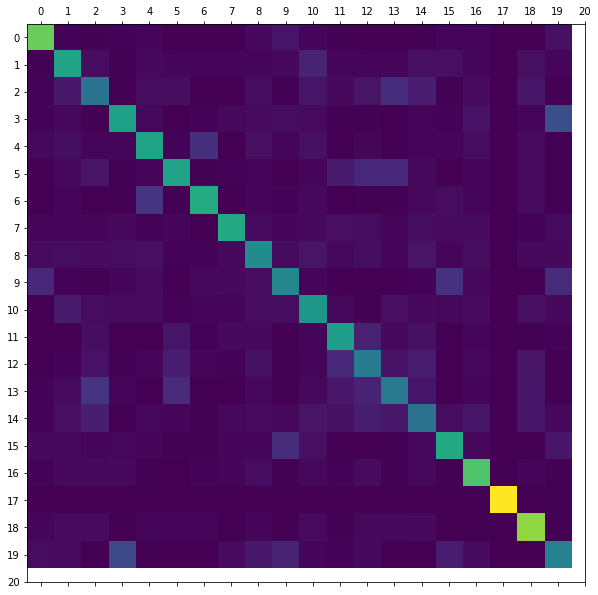

In [ ]:
plot_confusion_matrix(cm)